In [ ]:
# https://www.gif-vif.com/you-are-a-wizard-doggo

## Test Browser

In [3]:
#Test Browser
import requests
url = "https://www.gif-vif.com/you-are-a-wizard-doggo"
res = requests.get(url) # 取得回應
res

# 200：ok
# 4xx：User Error
# 5xx：Server Error

<Response [200]>

In [4]:
# Print all the HTML 
print(res.text)



<!DOCTYPE html>
<html lang="en">
    <head >
        <title>You are a wizard doggo, dog GIFs - Gifvif</title>
        <meta charset="utf-8" />   
        <meta name="description" content="You are a wizard doggo, dog GIFs | Search for More dog GIFs on www.GIF-VIF.com" />     
      <meta name="medium" content="image" />
      <link rel="canonical" href="https://www.gif-vif.com/you-are-a-wizard-doggo">
      <meta property="fb:app_id" content="1250511768360553">
      
      <meta property="og:site_name" content="GIFVIF">
      <meta property="og:url" content="https://www.gif-vif.com/you-are-a-wizard-doggo.gif">
      <meta property="og:title" content="You are a wizard doggo,dog GIFs">
      <meta property="og:description" content="You are a wizard doggo, Find More dog GIFs on GIF-VIF">
      <meta property="og:type" content="video.other">
      <meta property="og:image:secure_url" content="https://media.giphy.com/media/W0yN0GEVU2eHUeYlYQ/giphy.gif">
      <meta property="og:image" con

In [5]:
# beautiful soup the all HTML 
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'lxml') # lxml是解析方式
soup

<!DOCTYPE html>
<html lang="en">
<head>
<title>You are a wizard doggo, dog GIFs - Gifvif</title>
<meta charset="utf-8"/>
<meta content="You are a wizard doggo, dog GIFs | Search for More dog GIFs on www.GIF-VIF.com" name="description"/>
<meta content="image" name="medium"/>
<link href="https://www.gif-vif.com/you-are-a-wizard-doggo" rel="canonical"/>
<meta content="1250511768360553" property="fb:app_id"/>
<meta content="GIFVIF" property="og:site_name"/>
<meta content="https://www.gif-vif.com/you-are-a-wizard-doggo.gif" property="og:url"/>
<meta content="You are a wizard doggo,dog GIFs" property="og:title"/>
<meta content="You are a wizard doggo, Find More dog GIFs on GIF-VIF" property="og:description"/>
<meta content="video.other" property="og:type"/>
<meta content="https://media.giphy.com/media/W0yN0GEVU2eHUeYlYQ/giphy.gif" property="og:image:secure_url"/>
<meta content="https://media.giphy.com/media/W0yN0GEVU2eHUeYlYQ/giphy.gif" property="og:image"/>
<meta content="image/gif" propert

In [6]:
# catch the video
vidio_elements = soup.find_all("video")
vidio_elements

[<video autoplay="" loop="" muted="" playsinline="" poster="https://media.giphy.com/media/W0yN0GEVU2eHUeYlYQ/giphy.gif">
 <source src="https://media.giphy.com/media/W0yN0GEVU2eHUeYlYQ/giphy.mp4" type="video/mp4"/>
 </video>,
 <video autoplay="" loop="" muted="" poster="https://media.giphy.com/media/W0yN0GEVU2eHUeYlYQ/giphy.gif">
 <source src="https://media.giphy.com/media/W0yN0GEVU2eHUeYlYQ/giphy.mp4" type="video/mp4"/>
 </video>]

In [7]:
# catch 0 index's poster
gif_url = vidio_elements[0].get("poster")
gif_url

'https://media.giphy.com/media/W0yN0GEVU2eHUeYlYQ/giphy.gif'

In [8]:
# Catch again write down
gif = requests.get(gif_url)
with open("demo.gif", "wb") as f:
    f.write(gif.content)

In [15]:
# Find Next Url

# Catch div id 
# Catch div with "a" in div & href 
next_url = soup.find(id="share_and_next").find_all("a")[-1].get("href")
print(next_url)

https://www.gif-vif.com/Turtle-Vs-Beer-can


In [13]:
# <div id="share_and_next">
#     <div id="share_buttons">
#         <a href="javascript:void(0)"><img onclick="window.open(&quot;https://www.facebook.com/sharer/sharer.php?u=https://www.gif-vif.com/You-are-a-wizard-doggo/?fbrefresh=23&quot;, &quot;Post to facebook&quot;, &quot;width=600,height=400,left=200&quot;)" src="https://www.gif-vif.com/web_images/fb_share.png"></a>
#         <a href="https://pinterest.com/pin/create/button/?url=https://www.gif-vif.com/You-are-a-wizard-doggo&amp;media=https://media.giphy.com/media/W0yN0GEVU2eHUeYlYQ/giphy.gif&amp;description=You are a wizard doggo" target="_blank"><img src="https://www.gif-vif.com/web_images/pinterest_share.png"></a>
#         <a href="https://www.reddit.com/submit?url=https://www.gif-vif.com/You-are-a-wizard-doggo/&amp;title=You are a wizard doggo" target="_blank"><img src="https://www.gif-vif.com/web_images/reddit_share.png"></a>
#     </div>
#     <a href="https://www.gif-vif.com/Turtle-Vs-Beer-can"><div id="next_div">
#         Next gif <img class="icon_align" src="https://www.gif-vif.com/web_images/next_page_icon.png">
#     </div></a>
# </div>

## web download

In [12]:
def get_gif(url):
    
    # 1. url = "https://www.gif-vif.com/you-are-a-wizard-doggo"
    title = url.split("/")[-1]
    print("getting gif",title)
    #print(f"getting gif {title}")
    res = requests.get(url) # 取得回應
    
    # 2. BeautifulSoup
    soup = BeautifulSoup(res.text, 'lxml')
    vidio_elements = soup.find_all("video")
    gif_url = vidio_elements[0].get("poster")

    # 3.Download gif
    gif = requests.get(gif_url)
    with open(f"{title}.gif", "wb") as f:
        f.write(gif.content)
    
    # 4. Next Url尋找下一個url
    next_url = soup.find(id="share_and_next").find_all("a")[-1].get("href")
    return next_url


if __name__ == "__main__":
    url = "https://www.gif-vif.com/you-are-a-wizard-doggo"
    for i in range(10):
        url = get_gif(url)

getting gif you-are-a-wizard-doggo
getting gif Turtle-Vs-Beer-can
getting gif When-sports-is-not-your-thing
getting gif Poor-guy-129
getting gif How-not-to-prank-friends
getting gif Moving-house
getting gif Crushing-CDs
getting gif When-you-want-to-go-swimming-but-water-is-too-cold
getting gif Naah-not-a-rat
getting gif Keep-petting-me


## Stock catch

點選 Header，看 General 的 Request URL 及 Method 與 Response Headers 的 Content-Type 可以知道：
https://ithelp.ithome.com.tw/upload/images/20211006/20139358GVxM0ylTC2.png

- URL：https://www.twse.com.tw/exchangeReport/STOCK_DAY。
- 必要 Query：response=json&date=20211006&stockNo=2330。所以可以根據需求在 Query 的 response、date、stockNo 代入想要的值。
- HTTP Method 是 GET。
- Headers 的 Content-Type：application/json;charset=UTF-8 所以格式是 JSON，編碼為 UTF-8。
- 另外我們也知道了，不管我們 Query 的 date 是幾號，他的 server 是整個月份的日成交資訊都回給你，這點要注意一下喔！

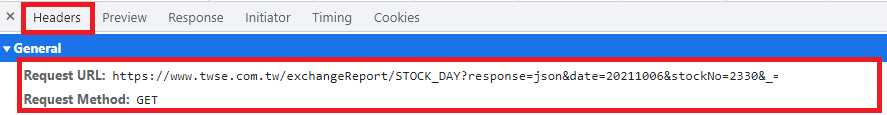

In [16]:
# https://www.twse.com.tw/zh/page/trading/exchange/STOCK_DAY.html

In [18]:
import requests

url = "https://www.twse.com.tw/exchangeReport/STOCK_DAY"

# 
res = requests.get(url, params={
    "response": "json",
    "date": "20211006",
    "stockNo": "2330"
})

# 把 JSON 轉成 Python 可存取之型態
res_json = res.json()

# 我們要的每日成交資訊在 data 這個欄位
daily_price_list = res_json.get("data", [])

# 該欄位是 List 所以用 for 迴圈印出
for daily_price in daily_price_list:
    print(daily_price)

['110/10/01', '39,006,124', '22,368,447,571', '579.00', '579.00', '571.00', '574.00', '-6.00', '78,088']
['110/10/04', '22,288,138', '12,741,914,919', '574.00', '575.00', '569.00', '572.00', '-2.00', '42,147']
['110/10/05', '36,063,650', '20,406,526,124', '562.00', '572.00', '560.00', '572.00', ' 0.00', '56,678']
['110/10/06', '33,989,379', '19,345,468,774', '573.00', '574.00', '565.00', '571.00', '-1.00', '53,606']
['110/10/07', '28,480,400', '16,458,019,782', '575.00', '582.00', '572.00', '580.00', '+9.00', '23,304']
['110/10/08', '22,601,904', '13,051,944,932', '582.00', '583.00', '573.00', '575.00', '-5.00', '24,157']
['110/10/12', '27,126,088', '15,455,194,493', '570.00', '575.00', '564.00', '575.00', ' 0.00', '32,210']
['110/10/13', '19,267,437', '11,006,807,040', '572.00', '575.00', '570.00', '571.00', '-4.00', '18,050']
['110/10/14', '14,270,641', '8,213,170,376', '579.00', '579.00', '573.00', '573.00', '+2.00', '14,814']


## Stock catch 2

根據前篇得到的資訊：

- URL：https://isin.twse.com.tw/isin/class_main.jsp。
- 必要的 Query：market=1&issuetype=1&Page=1&chklike=Y。
- 所以可以根據需求在 Query 的 market、issuetype、Page、chklike 代入自己要的值。
- HTTP Method 是 GET。
- Content-Type：text/html;charset=MS950，所以格式是 HTML，編碼為 MS950。

In [ ]:
# project2
# pip install beautifulsoup4
# pip install lxml

In [22]:
from bs4 import BeautifulSoup
html = "<html>test test test</html>"
soup = BeautifulSoup(html, "lxml")
soup

<html><body><p>test test test</p></body></html>

In [23]:
from bs4 import BeautifulSoup
html = "<title>example1</title><title>example2</title>"
soup = BeautifulSoup(html, "lxml")

# find_all() 會搜尋整個 html 回傳符合的值
print(soup.find_all("title"))
# [<title>example1</title>, <title>example2</title>]

# find() 只會回傳"第一個"符合的值
print(soup.find("title"))
# <title>example1</title>

# 拿取 tag 之間的 text
print(soup.find("title").text)
# example1


[<title>example1</title>, <title>example2</title>]
<title>example1</title>
example1


In [24]:
import json
import requests
from bs4 import BeautifulSoup
# index constant，數字代表我們要的資料在 list 的位置
TARGET_TABLE_INDEX = 1
STOCK_NO_INDEX = 2
STOCK_NAME_INDEX = 3
STOCK_INDUSTRY_INDEX = 6

# JSON settings
TITLE = "stock"
JSON_INDENT = 4

# HTTP Request
url = "https://isin.twse.com.tw/isin/class_main.jsp"
res = requests.get(url, params={
    "market": "1",
    "issuetype": "1",
    "Page": "1",
    "chklike": "Y"
})

# 處理編碼，使用預設 utf-8 的話 res.text 的內容會有亂碼
res.encoding = "MS950"
res_html = res.text

# Parse
soup = BeautifulSoup(res_html, "lxml")

# HTML 裡面有兩張 table
tr_list = soup.find_all("table")[TARGET_TABLE_INDEX].find_all("tr") #find_all("table") 回傳的 list length 是 2
tr_list.pop(0)  # item 是欄位名稱用不到所以 pop 掉

# 開始處理資料
result = []
for tr in tr_list:
    td_list = tr.find_all("td")
    stock_no_val = td_list[STOCK_NO_INDEX].text  #Num
    stock_name_val = td_list[STOCK_NAME_INDEX].text #Name
    stock_industry_val = td_list[STOCK_INDUSTRY_INDEX].text #Industry

    # Save to dict
    result.append({
        "stockNo": stock_no_val,
        "stockName": stock_name_val,
        "stockIndustry": stock_industry_val
    })

#Download
stock_list_dict = {TITLE: result}
with open("stock_info_list.json", "w", encoding="utf-8") as f:
    f.write(json.dumps(stock_list_dict, indent=JSON_INDENT, ensure_ascii=False))

## User-Agent  Change 偽裝

F12 -> Network -> Request -> Headers -> User Agent

In [1]:
import requests
res = requests.get("https://www.google.com/")  #your browser
print(res.request.headers)

{'User-Agent': 'python-requests/2.24.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}


In [1]:
# pip install fake-useragent

In [6]:
# Sned Request User-agent。
from fake_useragent import UserAgent
ua = UserAgent()

# browser User-Agent
ua.ie
ua.google
ua.firefox
ua.safari
ua.random

'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/31.0.1623.0 Safari/537.36'

In [7]:
import requests
from fake_useragent import UserAgent

ua = UserAgent()
res = requests.get("https://www.google.com/", headers={
    "User-Agent": ua.random
})

print(res.request.headers)

{'User-Agent': 'Mozilla/5.0 (Windows NT 6.2; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/32.0.1667.0 Safari/537.36', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}


## multithreading

In [8]:
import time
def req1():
    print("req1: 開始送 request") 
    time.sleep(3)
    print("req1: 接收到 response") 
def req2():
    print("req2: 開始送 request") 
    time.sleep(3)
    print("req2: 接收到 response")

if __name__ == '__main__':
    req1()
    req2()

req1: 開始送 request
req1: 接收到 response
req2: 開始送 request
req2: 接收到 response


In [9]:
# import python 的多執行緒套件
import time
from threading import Thread

def req1():
    print("req1: 開始送 request") 
    time.sleep(3)
    print("req1: 接收到 response") 

def req2():
    print("req2: 開始送 request") 
    time.sleep(3)
    print("req2: 接收到 response")

if __name__ == '__main__':
    # 先將 funtion 包裝成 thread 的物件，再執行
    Thread(target=req1).start()
    Thread(target=req2).start()

req1: 開始送 request
req2: 開始送 request
req1: 接收到 response
req2: 接收到 response


In [10]:
import time
import requests
from threading import Thread

# 將流程先用 function 封裝起來，接下來才能帶入 thread 中
def daily_price_req(date, stock_no):
    res = requests.get("https://www.twse.com.tw/exchangeReport/STOCK_DAY",
                       params={
                           "response": "json",
                           "date": date,
                           "stockNo": stock_no
                       })

    # 把 JSON 轉成 Python 可存取之型態
    res_json = res.json()

    # 我們要的每日成交資訊在 data 這個欄位
    daily_price_list = res_json['data']

    # 印出資料
    print("{} 每日成交資訊: {}".format(stock_no, daily_price_list))


if __name__ == '__main__':
    # 日期什麼的，可以依照需求設定
    req_info_list = [
        {
            "date": "20211011",
            "stockNo": "2330"
        },
        {
            "date": "20211011",
            "stockNo": "2603"
        },
        {
            "date": "20211011",
            "stockNo": "2609"
        }
    ]

    for req_info in req_info_list:
        req_date = req_info.get("date")
        req_stock_no = req_info.get("stockNo")
        if req_date and req_stock_no:
            # args 為 function 會用到的參數
            req_thread = Thread(target=daily_price_req,
                                args=(req_date, req_stock_no))
            req_thread.start()

            # 每個 req 間隔最好 3 秒以上，不然會被證交所鎖 IP 一段時間
            time.sleep(3)

2330 每日成交資訊: [['110/10/01', '39,006,124', '22,368,447,571', '579.00', '579.00', '571.00', '574.00', '-6.00', '78,088'], ['110/10/04', '22,288,138', '12,741,914,919', '574.00', '575.00', '569.00', '572.00', '-2.00', '42,147'], ['110/10/05', '36,063,650', '20,406,526,124', '562.00', '572.00', '560.00', '572.00', ' 0.00', '56,678'], ['110/10/06', '33,989,379', '19,345,468,774', '573.00', '574.00', '565.00', '571.00', '-1.00', '53,606'], ['110/10/07', '28,480,400', '16,458,019,782', '575.00', '582.00', '572.00', '580.00', '+9.00', '23,304'], ['110/10/08', '22,601,904', '13,051,944,932', '582.00', '583.00', '573.00', '575.00', '-5.00', '24,157'], ['110/10/12', '27,126,088', '15,455,194,493', '570.00', '575.00', '564.00', '575.00', ' 0.00', '32,210'], ['110/10/13', '19,267,437', '11,006,807,040', '572.00', '575.00', '570.00', '571.00', '-4.00', '18,050'], ['110/10/14', '14,270,641', '8,213,170,376', '579.00', '579.00', '573.00', '573.00', '+2.00', '14,814']]
2603 每日成交資訊: [['110/10/01', '312,

In [11]:
req_thread_list = []
for req_info in req_info_list:
        req_date = req_info.get("date")
        req_stock_no = req_info.get("stockNo")
        if req_date and req_stock_no:
            req_thread = Thread(target=daily_price_req,
                                args=(req_date, req_stock_no))
            req_thread.start()
            req_thread_list.append(req_thread)

            # 每個 req 間隔最好 3 秒以上，不然會被證交所鎖 IP 一段時間
            time.sleep(3)

for req_thread in req_thread_list:
    # join() 就是讓程式等著，確定該 thread 已經執行完畢之後再繼續往下
    # 所以這邊的用法是說：
    # 我的程式會在這邊等所有 req thread（daily_price_req 裡的那些動作）都執行完畢後再往下做
    req_thread.join()

# do something...
print("Ending...")

2330 每日成交資訊: [['110/10/01', '39,006,124', '22,368,447,571', '579.00', '579.00', '571.00', '574.00', '-6.00', '78,088'], ['110/10/04', '22,288,138', '12,741,914,919', '574.00', '575.00', '569.00', '572.00', '-2.00', '42,147'], ['110/10/05', '36,063,650', '20,406,526,124', '562.00', '572.00', '560.00', '572.00', ' 0.00', '56,678'], ['110/10/06', '33,989,379', '19,345,468,774', '573.00', '574.00', '565.00', '571.00', '-1.00', '53,606'], ['110/10/07', '28,480,400', '16,458,019,782', '575.00', '582.00', '572.00', '580.00', '+9.00', '23,304'], ['110/10/08', '22,601,904', '13,051,944,932', '582.00', '583.00', '573.00', '575.00', '-5.00', '24,157'], ['110/10/12', '27,126,088', '15,455,194,493', '570.00', '575.00', '564.00', '575.00', ' 0.00', '32,210'], ['110/10/13', '19,267,437', '11,006,807,040', '572.00', '575.00', '570.00', '571.00', '-4.00', '18,050'], ['110/10/14', '14,270,641', '8,213,170,376', '579.00', '579.00', '573.00', '573.00', '+2.00', '14,814']]
2603 每日成交資訊: [['110/10/01', '312,

## Project 自動更新每日個股日成交資訊

In [14]:
#進度條 progress bar

class ProgressBar:
    bar_string_fmt = '\rProgress: [{}{}] {:.2%} {}/{}'
    cnt = 0

    def __init__(self, total, bar_total=20):
        self.total = total # task 的總數
        self.bar_total = bar_total  # progress bar 的長度

    def update(self, step=1):
        total = self.total
        self.cnt += step           # 更新 progress bar 的進度
        bar_cnt = (int((self.cnt/total)*self.bar_total))  # bar 的數量
        space_cnt = self.bar_total - bar_cnt  # 空白的數量

        # 顯示 progress bar '\r' 的意思代表 replace，print 出來的字串不會印在新的一行而是 replace 原本那行同位置的字符
        # {:.2%}，表示 format 進來的值會以百分比顯示，並只取到小數點後兩位
        progress = self.bar_string_fmt.format(
            '█' * bar_cnt,
            ' ' * space_cnt,
            self.cnt/total,
            self.cnt,
            total
        )
        print(progress, end='')

        # 100%
        if self.cnt/total == 1:
            print('\n')
            
if __name__ == '__main__':
    total = 10000
    progress_bar = ProgressBar(total)
    for _ in range(total):
        progress_bar.update()

Progress: [███                 ] 18.94% 1894/10000

Progress: [███████             ] 36.67% 3667/10000

Progress: [██████████          ] 53.93% 5393/10000

Progress: [██████████████      ] 73.92% 7392/10000

Progress: [██████████████████  ] 93.92% 9392/10000

Progress: [████████████████████] 100.00% 10000/10000



In [15]:
import json
import time
import requests
from pathlib import Path
from threading import Thread
from datetime import datetime
from fake_useragent import UserAgent

class DailyPriceSpider:
    def __init__(self, progress_bar=None):
        
        # 重複使用 TCP 連線
        self.req = requests.Session()
        self.url = "https://www.twse.com.tw/exchangeReport/STOCK_DAY"
        self.headers = self.req.headers
        
        # 偽裝 User-Agent
        ua = UserAgent()
        self.headers["User-Agent"] = ua.random
        
        # 加入 progress bar
        if progress_bar:
            self.progress_bar = progress_bar
 
    # 供內部使用
    def __get(self, date, stock_no):
        res = self.req.get(self.url,
                           headers = self.headers,
                           params={
                               "response": "csv",  # 這次抓的是 csv 格式
                               "date": date,
                               "stockNo": stock_no
                           })
        return res.text
    
    # 供內部使用
    def __save_file(self, res_text, path):  # 去掉 res_text 裡多餘的空白行
        res_text = '\n'.join(
            filter(None,res_text.splitlines())
        )
        path = Path(path)
        
        # parents=True，如果父資料夾不存在則會一併創建
        # exist_ok=True，創建資料夾時，該資料夾已存在則不會 throw exception
        path.parent.mkdir(parents=True, exist_ok=True)
        with open(path, 'w', encoding="utf-8") as file:
            file.write(res_text)
        return
 
    
    def scrape(self, date, stock_no, save_path=""):
        # 把上面的兩個 function 整合
        res_text = self.__get(date, stock_no)
        if save_path:
            self.__save_file(res_text, save_path)
            
        # 更新 progress bar
        if self.progress_bar:
            self.progress_bar.update()


if __name__ == '__main__':
    SAVE_PATH_ROOT = "./daily_stock_price/"
    SLEEP_TIME = 3
    stock_info_list_file = {}
    with open("./stock_info_list.json", "r", encoding="utf-8") as f:
        stock_info_list_file = json.load(f)

    # 不管日期是幾號，他回傳都是給我們一整個月的，所以就固定設成1號就好
    # strftime()，把 datetime 輸出成我們要的格式
    today_date = "{}01".format(datetime.now().strftime("%Y%m"))

    stock_info_list = stock_info_list_file.get("stock", [])
    
    # 加入 progress bar
    progress_bar = ProgressBar(len(stock_info_list))
    dps = DailyPriceSpider(progress_bar=progress_bar)
    req_thread_list = []

    for stock_info in stock_info_list:

        stock_no = stock_info.get("stockNo")
        stock_name = stock_info.get("stockName")
        stock_industry = stock_info.get("stockIndustry")
        file_name = "{}_{}_daily_price.csv".format(
            today_date[:-2],  # 字串只需要用到年跟月
            stock_no+stock_name)

        save_path = "{}/{}/{}/{}".format(SAVE_PATH_ROOT,
                                         stock_industry,
                                         stock_no+stock_name,
                                         file_name)

        if stock_no and stock_name and stock_industry:
            req_thread = Thread(target=dps.scrape,
                                args=(today_date, stock_no, save_path),
                                daemon=True)
            req_thread.start()
            req_thread_list.append(req_thread)
            time.sleep(SLEEP_TIME)

    for req_thread in req_thread_list:
        req_thread.join()

    print("Finished")


Progress: [██████████████████  ] 91.09% 869/954

Exception in thread Thread-934:
Traceback (most recent call last):
  File "C:\Users\cti110016\Anaconda3\lib\pathlib.py", line 1284, in mkdir
    self._accessor.mkdir(self, mode)
OSError: [WinError 123] The filename, directory name, or volume label syntax is incorrect: 'daily_stock_price\\電子通路業\\8070長華*'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\cti110016\Anaconda3\lib\threading.py", line 932, in _bootstrap_inner
    self.run()
  File "C:\Users\cti110016\Anaconda3\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-15-e240636c217f>", line 55, in scrape
  File "<ipython-input-15-e240636c217f>", line 45, in __save_file
  File "C:\Users\cti110016\Anaconda3\lib\pathlib.py", line 1293, in mkdir
    if not exist_ok or not self.is_dir():
  File "C:\Users\cti110016\Anaconda3\lib\pathlib.py", line 1403, in is_dir
    return S_ISDIR(self.stat().st_mode)
  File "C:\U

Progress: [███████████████████ ] 99.90% 953/954Finished


## Project 2 ithome 靜態爬蟲

In [16]:
import requests
from bs4 import BeautifulSoup

response = requests.get(
    "https://ithelp.ithome.com.tw/articles?tab=tech",
    headers={
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.107 Safari/537.36"
    })

soup = BeautifulSoup(response.text, "html.parser")
data = soup.select("h3.qa-list__title a")

for d in data:
    print(d["href"], d.text)

https://ithelp.ithome.com.tw/articles/10281822 簡報版-第九章-認識物聯網安全~從各式聯網設備的風險看起
https://ithelp.ithome.com.tw/articles/10281819 小結
https://ithelp.ithome.com.tw/articles/10281820 [Day 30] 阿嬤成為網頁前端工程師的下一步
https://ithelp.ithome.com.tw/articles/10281817 盤點清查與檢測掃描 - 盤點文件、清查舊系統、帳號
https://ithelp.ithome.com.tw/articles/10281816 [Day30] 讓Web開發者森77之後 / 總結
https://ithelp.ithome.com.tw/articles/10281811 【Day34】[演算法]-費波那契數列Fibonacci Sequence
https://ithelp.ithome.com.tw/articles/10281809 Day 30：完賽了，下次一起再來參加鐵人賽吧！
https://ithelp.ithome.com.tw/articles/10281815 [Day30] Cloud Meow Meow
https://ithelp.ithome.com.tw/articles/10281813 [Day30] Pentesting CheatSheet Meow Meow 
https://ithelp.ithome.com.tw/articles/10281804 挑戰 30 日心得紀錄
https://ithelp.ithome.com.tw/articles/10281802 【Day 30】總結
https://ithelp.ithome.com.tw/articles/10281806 前端藏寶圖 - 寶藏在哪兒？
https://ithelp.ithome.com.tw/articles/10281805 Day30 MANO開源專案使用之kube5gnfvo - 使用篇
https://ithelp.ithome.com.tw/articles/10281803 用React刻自己的投資Dashboard Day30 - 股票代